In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./combinedData.csv',index_col=None, header=0,sep=',')

In [82]:
df.head()
df2 = df.drop(['Estimated', 'RETIRED','STATION','DAY'], axis = 1)
df2.head()

,DATE,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,...,7 pm,8 pm,9 pm,10 pm,11 pm,12 mid,TOTAL,Station number,Direction,COUNTY
0,"Jan 1, 2002",3,12,4,4,4,3,1,3,3,...,11,9,8,10,16,5,200,8,East,Norman
1,"Jan 2, 2002",2,0,0,1,0,3,7,14,13,...,16,16,13,10,0,6,320,8,East,Norman
2,"Jan 3, 2002",2,0,2,0,2,4,6,50,33,...,61,20,13,20,3,0,422,8,East,Norman
3,"Jan 4, 2002",4,1,1,0,0,3,5,39,28,...,76,48,25,49,25,28,646,8,East,Norman
4,"Jan 5, 2002",6,7,3,1,0,2,11,8,9,...,15,16,16,8,14,8,297,8,East,Norman


In [83]:
group1 = df2.groupby(['Station number','Direction'])
group1

In [84]:
MEAN = group1.mean()
MEAN.head()

1 am       2 am       3 am       4 am  \
Station number Direction                                                
8              East         1.640993   1.237817   0.700128   0.459573   
               North        1.785714   1.107143   0.821429   0.500000   
               South        1.071429   0.714286   0.357143   0.500000   
               West         1.291477   0.839022   0.599927   0.432196   
26             North      111.533251  88.068358  83.696876  87.356944   

                                5 am        6 am        7 am        8 am  \
Station number Direction                                                   
8              East         0.403541    1.732980    4.117905   13.843767   
               North        0.321429    1.750000    2.642857    5.821429   
               South        0.535714    2.607143    3.750000    8.892857   
               West         0.475817    2.315204    5.013689   13.081949   
26             North      122.058460  199.324157  269.670275  352.252706   

                                9 am       10 am     ...             4 pm  \
Station number Direction                             ...                    
8              East        15.052747   14.661982     ...        20.209162   
               North       10.107143   11.678571     ...        13.071429   
               South        7.892857   10.321429     ...        10.642857   
               West        11.620186   12.268297     ...        20.911663   
26             North      391.448500  484.120012     ...       773.401175   

                                5 pm        6 pm        7 pm        8 pm  \
Station number Direction                                                   
8              East        21.426355   22.715094   18.309181   12.589524   
               North       15.678571   14.892857   12.250000    7.535714   
               South       11.607143   10.321429    8.321429    6.964286   
               West        17.198211   17.196204   13.776967   10.993612   
26             North      765.510362  707.325704  585.245902  479.120940   

                                9 pm       10 pm       11 pm      12 mid  \
Station number Direction                                                   
8              East         9.946341    7.866216    4.744296    2.595729   
               North        7.464286    7.321429    5.285714    3.428571   
               South        6.535714    6.035714    3.714286    1.678571   
               West        10.384559    8.670013    4.311006    2.231794   
26             North      396.426539  313.426848  236.156820  159.299722   

                                TOTAL  
Station number Direction               
8              East        252.708158  
               North       194.142857  
               South       164.392857  
               West        227.891769  
26             North      9877.120322  

[5 rows x 25 columns]

In [85]:
spec_mean = lambda df: (df -df.mean())/df.std()
spec_nothing = lambda df: df
df3 = group1.transform(spec_mean)

In [86]:
test = df2[(df2['Station number']==228) & (df2['Direction']=='North')]
std = test.std()
mean = test.mean()

In [87]:
df3.columns = df3.columns + "_zscore"
df3.head()

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
0,0.651382,6.341178,2.837583,4.276353,4.516979,0.838550,-0.978443,-1.133966,-1.329468,-1.636870,...,-0.131339,-0.984519,-0.501897,-0.657282,-0.491015,-0.357448,0.374007,2.875496,0.874173,-0.709647
1,0.172075,-0.729333,-0.602045,0.652762,-0.506828,0.838550,0.904443,0.016338,-0.226427,0.665990,...,0.520382,-0.044530,-0.062799,-0.207654,0.466523,0.560808,0.374007,-1.212026,1.237765,0.905998
2,0.172075,-0.729333,1.117769,-0.555101,2.005076,1.500379,0.590628,3.780968,1.979657,0.051894,...,1.497964,1.208789,0.903216,3.838996,1.013688,0.560808,2.126795,-0.445616,-0.943786,2.279297
3,1.130689,-0.140124,0.257862,-0.555101,-0.506828,0.838550,0.276814,2.630664,1.428136,2.508277,...,2.149685,2.670995,6.260209,5.187880,4.843842,2.764622,7.209879,5.174727,9.236784,5.295168
4,2.089303,3.395132,1.977676,0.652762,-0.506828,0.176721,2.159700,-0.611101,-0.667643,0.512466,...,0.303141,-0.148973,-1.116634,-0.297580,0.466523,1.111761,0.023449,2.364556,1.964948,0.596333


In [88]:
bins = [-1000,-2,-1,-.35,.35,1,2,1000]
names = ['below extreme','-z2', '-z1','norm','z1', 'z2','above extreme']

In [90]:
df4 = df3.apply(lambda x: pd.cut(x, bins=bins,labels= names))
df4 = pd.concat([df4,df2[['DATE','Station number', 'Direction', 'COUNTY']]], axis =1)

path =r'./association.csv' # use your path
df4.to_csv(path,sep=',',index=False)


In [91]:
df4.head()

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore,DATE,Station number,Direction,COUNTY
0,z1,above extreme,above extreme,above extreme,above extreme,z1,-z1,-z2,-z2,-z2,...,-z1,-z1,z1,above extreme,z1,-z1,"Jan 1, 2002",8,East,Norman
1,norm,-z1,-z1,z1,-z1,z1,z1,norm,norm,z1,...,z1,z1,z1,-z2,z2,z1,"Jan 2, 2002",8,East,Norman
2,norm,-z1,z2,-z1,above extreme,z2,z1,above extreme,z2,norm,...,z2,z1,above extreme,-z1,-z1,above extreme,"Jan 3, 2002",8,East,Norman
3,z2,norm,norm,-z1,-z1,z1,norm,above extreme,z2,above extreme,...,above extreme,above extreme,above extreme,above extreme,above extreme,above extreme,"Jan 4, 2002",8,East,Norman
4,above extreme,above extreme,z2,z1,-z1,norm,above extreme,-z1,-z1,z1,...,z1,z2,norm,above extreme,z2,z1,"Jan 5, 2002",8,East,Norman


In [92]:
pd.value_counts(df4['1 am_zscore'].values)

-z1              312629
norm             238969
z1               117546
z2                93157
-z2               72891
above extreme     34355
below extreme      1683
dtype: int64

In [93]:
result = df4.apply(pd.value_counts).fillna(0); result

C:\Users\brubakbd\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore,DATE,Station number,Direction,COUNTY
-z1,312629.0,307777.0,288052.0,251683.0,189186.0,116324.0,80979.0,74542.0,128020.0,175072.0,...,234802.0,238725.0,237231.0,257290.0,284906.0,190074.0,0.0,0.0,0.0,0.0
-z2,72891.0,70409.0,77677.0,86684.0,125011.0,184460.0,207461.0,201163.0,140180.0,101947.0,...,92956.0,92420.0,93893.0,94492.0,83162.0,102187.0,0.0,0.0,0.0,0.0
"Apr 1, 2002",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0
"Apr 1, 2003",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0
"Apr 1, 2004",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,0.0,0.0
"Apr 1, 2005",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,0.0,0.0
"Apr 1, 2006",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0
"Apr 1, 2007",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0
"Apr 1, 2008",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0
"Apr 1, 2009",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0


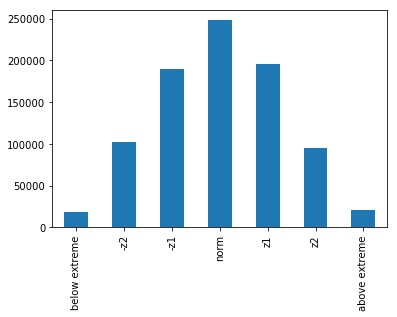

In [99]:
new_cols = ['below extreme', '-z2', '-z1', 'norm', 'z1', 'z2', 'above extreme']
result.TOTAL_zscore[new_cols].plot(kind = 'bar')
plt.show()

In [100]:
df5 = result.drop(['TOTAL_zscore'],axis = 1)
dfSums = df5.sum(axis=1)
df6 = dfSums[new_cols]

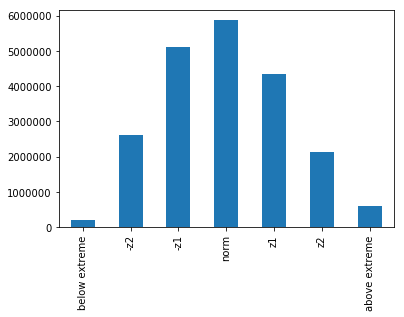

In [101]:
df6.plot(kind = 'bar', sort_columns=True)
plt.show()